# 如何用Python探索太陽觀測資料？
此notebook為[「用Python探索天文：從資料取得到視覺化」](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出。「用Python探索天文：從資料取得到視覺化」這本書是[「天文的資料科學」教育產品開發計畫](https://matters.news/@astrobackhacker/364036-%E5%A4%A9%E6%96%87%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E4%BE%86%E7%94%A8python%E6%8B%89%E8%BF%91%E6%88%91%E5%80%91%E8%88%87%E6%98%9F%E7%A9%BA%E7%9A%84%E8%B7%9D%E9%9B%A2-%E6%95%99%E8%82%B2%E7%94%A2%E5%93%81%E9%96%8B%E7%99%BC%E8%AA%BF%E6%9F%A5%E8%A1%A8%E5%96%AE-bafybeiahet2kggahd2wwst6flujiwkdwvg6wyiz23c4dtlgyvn2odhfdfi)的一部分，如果你想要體驗更多從資料產出天文新知識的旅程，歡迎填寫[這份調查表單](https://docs.google.com/forms/d/e/1FAIpQLSdSjnrvdsqAtALGfIMxXhQMZ9PRO-e_2ML6kzg6tjqyHNl1eA/viewform)，讓我能根據你的需求及建議，制定適合你的教學內容及呈現方式。

## (一) 哪些太陽觀測計畫有將資料開放給⼤眾使⽤？

以下列出幾個可以透過相關網站和Python程式下載到資料的太陽觀測計畫：

## Geostationary Operational Environmental Satellite (GOES)

GOES是由美國國家海洋暨大氣總署營運的一系列地球環境衛星，負責監測地球的大氣、水文、海洋、氣候以及太陽活動等資料，以便研究地球環境變化並預測自然災害事件。GOES的太陽觀測儀器主要包括Extreme Ultraviolet and X-ray Irradiance Sensors以及Solar Ultraviolet Imager。資料下載網址：[https://www.ngdc.noaa.gov/stp/satellite/goes-r.html](https://www.ngdc.noaa.gov/stp/satellite/goes-r.html)

## Solar and Heliospheric Observatory (SOHO)

SOHO是由歐洲太空總署和美國太空總署合作的太陽觀測衛星，目的是研究太陽的內部結構、外層大氣以及太陽風。SOHO裝載的觀測儀器多達12個，例如用來拍攝太陽日冕在紫外線範圍內高解析度影像的Extreme ultraviolet Imaging Telescope、偵測太陽風離子組成的Charge Element and Isotope Analysis System等等。資料下載網址：[https://soho.nascom.nasa.gov/data/data.html](https://soho.nascom.nasa.gov/data/data.html)

## Solar Terrestrial Relations Observatory (STEREO)

STEREO是美國太空總署主導的任務，由STEREO-A和STEREO-B兩個衛星所組成，在不同的位置對太陽進行觀測，藉由Extreme Ultraviolet Imager、Coronagraph、Heliospheric Imagers等儀器，建立日冕噴發現象的立體影像。資料下載網址：[https://stereo-ssc.nascom.nasa.gov/data.shtml](https://stereo-ssc.nascom.nasa.gov/data.shtml)

## Solar Dynamics Observatory (SDO)

SDO也是美國太空總署發射的太陽觀測衛星，透過Atmospheric Imaging Assembly、Extreme Ultraviolet Variability Experiment和Helioseismic and Magnetic Imager三個儀器，觀測太陽的大氣與磁場活動，以了解太陽如何影響地球及其周圍的太空環境。資料下載網址：[https://sdo.gsfc.nasa.gov/data/dataaccess.php](https://sdo.gsfc.nasa.gov/data/dataaccess.php)

## Parker Solar Probe

Parker Solar Probe是一個由美國太空總署發射的探測器，它飛往太陽並進入其大氣層，目的是讓人類首次收集太陽大氣的樣本資料，以便更深入理解日冕和太陽風、預測太陽對地球的影響。資料下載網址：[https://sppgway.jhuapl.edu](https://sppgway.jhuapl.edu)

## Expanded Owens Valley Solar Array

Expanded Owens Valley Solar Array是一個位於加州的電波望遠鏡陣列，透過它觀測太陽在微波範圍的電磁輻射，人類可以了解日冕的磁場結構，以及可能會對地球上通訊產生影響的太陽閃焰現象。資料下載網址：[http://ovsa.njit.edu/data.html](http://ovsa.njit.edu/data.html)

## (二) 如何用Python取得太陽觀測資料？

[SunPy](https://sunpy.org/)是一個專門用於太陽相關研究的Python套件，方便使用者取得、處理、分析和視覺化各種太陽觀測資料。執行以下指令以安裝SunPy及其擴充套件。

In [ ]:
pip install "sunpy[all]"

以下範例程式也會使用到[Astropy](https://www.astropy.org/)套件，它整合了天文資料處理分析過程所需的常用功能。例如，物理單位轉換、日期時間處理、星體坐標轉換、FITS檔案讀寫與操作、模型資料擬合、統計和畫圖等。Astropy為SunPy的相依套件，在安裝SunPy時也會一併安裝。

### SunPy的兩種資料取得工具：
* [sunpy.data的sample](https://docs.sunpy.org/en/stable/code_ref/data.html#module-sunpy.data.sample)是用來取得SunPy預先提供的範例檔案，方便教學展示和快速測試功能。
* [sunpy.net的Fido](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html)讓使用者能根據實際的資料分析需求，連線至不同的太陽觀測計畫的資料下載服務，進行搜尋並下載到特定觀測儀器在某段時間的資料。

In [1]:
# 此段程式示範如何用sunpy.data的sample功能來取得SunPy預先提供的範例檔案
# GOES_XRS_TIMESERIES：Geostationary Operational Environmental Satellite(GOES)上的儀器X-Ray Sensor(XRS)的時間序列觀測資料
# EIT_195_IMAGE：Solar and Heliospheric Observatory(SOHO)上的儀器Extreme ultraviolet Imaging Telescope(EIT)的影像觀測資料
# STEREO_A_195_JUN2012：STEREO-A上的儀器Extreme Ultraviolet Imager(EUVI)的影像觀測資料
# AIA_171_IMAGE：Solar Dynamics Observatory(SDO)上的儀器Atmospheric Imaging Assembly(AIA)的影像觀測資料

from sunpy.data.sample import (
  GOES_XRS_TIMESERIES, EIT_195_IMAGE,
  STEREO_A_195_JUN2012, AIA_171_IMAGE
)

print(GOES_XRS_TIMESERIES)
print(EIT_195_IMAGE)
print(STEREO_A_195_JUN2012)
print(AIA_171_IMAGE)

/home/yhsu/.local/share/sunpy/go1520110607.fits
/home/yhsu/.local/share/sunpy/eit_l1_20110607_203753.fits
/home/yhsu/.local/share/sunpy/20120601_000530_n4eua.fits
/home/yhsu/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits


In [2]:
'''
此段程式示範如何用sunpy.net的Fido功能來搜尋並下載特定觀測資料
Fido.search()會依據使用者所設定的篩選條件，如時間範圍、儀器名稱、電磁波波長等，來搜尋符合條件的資料，然後再藉由Fido.fetch()下載搜尋到的資料。
sunpy.net的attrs則是用來定義不同資料屬性的搜尋條件，例如，attrs.Time()用於定義時間範圍、attrs.Instrument()用於定義觀測的儀器、attrs.Wavelength()用於定義觀測的波長。
astropy的units提供天文學中常見物理單位的轉換和計算功能，例如波長單位。
'''

from sunpy.net import Fido, attrs as a
import astropy.units as u

# 設定要搜尋的觀測時間範圍
time = a.Time('2023/05/21 12:01', '2023/05/21 12:03') 

# 設定要搜尋的觀測儀器，AIA為Solar Dynamics Observatory的Atmospheric Imaging Assembly。可用print(a.Instrument)查看有哪些儀器
instrument_name = 'AIA'
instrument = a.Instrument(instrument_name)

# 設定要搜尋的觀測電磁波波長，例如，171埃
wavelength = a.Wavelength(171 * u.angstrom)

# 搜尋並下載符合時間、儀器和波長等篩選條件的資料
search_result = Fido.search(time, instrument, wavelength)
downloaded_files = Fido.fetch(search_result)
print(downloaded_files)

Files Downloaded:   0%|          | 0/10 [00:00<?, ?file/s]

['/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_01_09_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_01_21_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_01_33_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_01_45_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_01_57_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_02_09_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_02_21_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_02_33_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_02_45_35z_image_lev1.fits', '/home/yhsu/sunpy/data/aia_lev1_171a_2023_05_21t12_02_57_35z_image_lev1.fits']


In [3]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
chp,VSO,chp,Chromospheric Helium-I Imaging Photometer


In [4]:
'''
此段程式示範如何用Astropy套件讀取下載到的FITS檔案，並查看其資訊
'''
from astropy.io import fits

# 用fits.open()函式讀取FITS檔案
fits_file = AIA_171_IMAGE
hdu_list = fits.open(fits_file)

# 顯示每個Header/Data Unit(HDU)的摘要，如名稱、維度、資料類型等資訊
hdu_list.info()

# 顯示第2個HDU的標頭，包含資料維度、觀測儀器、觀測日期時間等元資料
print(hdu_list[1].header)

# 顯示第2個HDU的實際資料數值，可能是影像、時間序列表、光譜或者其他類型的天文學資料
print(hdu_list[1].data)

Filename: /home/yhsu/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    201   (1024, 1024)   float32   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1024                                                  NAXIS2  =                 1024                                                  BLD_VERS= 'V5R12X  '                                                            LVL_NUM =                  1.5                                                  T_REC   = '2011-06-07T06:33:03Z'                                                TRECSTEP=                  1.0                                                  TRECEPOC= '1977.

## (三) 如何用Python視覺化探索太陽觀測資料？

SunPy主要提供影像及時間序列這兩種類型的資料操作及視覺化功能。對於影像資料，你可以使用[Map物件](https://docs.sunpy.org/en/stable/tutorial/maps.html)來讀取、處理和視覺化探索，對於時間序列資料，則要使用[TimeSeries物件](https://docs.sunpy.org/en/stable/tutorial/timeseries.html)。這兩個物件都可以進一步用[Matplotlib套件](https://matplotlib.org/)來客製化圖的細節，如標題、XY軸範圍、顏色等等。

### 範例1：用Map物件視覺化探索太陽影像資料

2023-05-21T12:01:09.350
2.000154 s
[[ 1 -1 -2 ...  2  0 -2]
 [ 0 -1 -2 ...  1  1 -1]
 [ 0  0 -1 ... -1 -1  1]
 ...
 [-1  0  1 ...  0  1  0]
 [-2 -1 -1 ... -1 -1 -1]
 [-1 -2  0 ...  0  1 -1]]


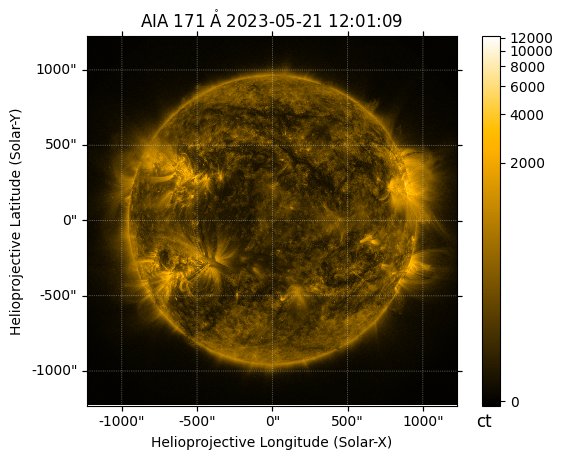

In [5]:
# 引入SunPy的Map類別
from sunpy.map import Map

# 從之前藉由sunpy.net的Fido所下載的檔案中，取得第一個影像檔案
image_file = downloaded_files[0]

# 使用Map類別來產生一個Map物件，並將影像檔案作為參數傳入
map_obj = Map(image_file)

# 顯示Map物件的一些屬性，例如觀測日期、曝光時間和影像資料數值
print(map_obj.date)
print(map_obj.exposure_time)
print(map_obj.data)

# 使用Map物件的peek()方法來預覽影像
map_obj.peek()

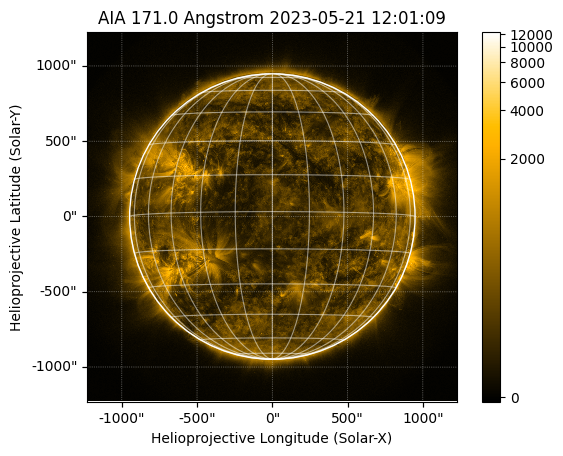

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(projection=map_obj)
map_obj.plot()
plt.title(map_obj.name)
map_obj.draw_limb()
map_obj.draw_grid()
plt.colorbar()
plt.show()

### 範例2：用TimeSeries物件視覺化探索太陽時間序列資料

In [7]:
# 引入SunPy的TimeSeries和TimeRange類別
from sunpy.timeseries import TimeSeries
from sunpy.time import TimeRange

# 使用TimeSeries類別來產生一個TimeSeries物件，並讀取之前藉由sunpy.data的sample取得的時間序列範例檔案
ts_file = GOES_XRS_TIMESERIES
ts_obj = TimeSeries(ts_file)

# 顯示TimeSeries物件的一些屬性，例如觀測站名稱、觀測時間範圍、時間序列資料數值
print(ts_obj.observatory)
print(ts_obj.time_range)
print(ts_obj.data)

# 使用TimeRange類別來產生一個TimeRange物件，用於指定一個時間範圍
tr = TimeRange('2011-06-07 10:00', '2011-06-07 11:30')

# 使用TimeSeries物件的truncate()方法來截取指定時間範圍內的資料，並顯示資料截取後的觀測時間範圍
ts_obj_trunc = ts_obj.truncate(tr)
print(ts_obj_trunc.time_range)

GOES-15
    Start: 2011-06-06 23:59:59
    End:   2011-06-07 23:59:57
    Center:2011-06-07 11:59:58
    Duration:0.9999730324069096 days or
           23.99935277776583 hours or
           1439.9611666659498 minutes or
           86397.66999995698 seconds

                                       xrsa          xrsb
2011-06-06 23:59:59.961999893  1.000000e-09  1.887100e-07
2011-06-07 00:00:02.008999944  1.000000e-09  1.834600e-07
2011-06-07 00:00:04.058999896  1.000000e-09  1.860900e-07
2011-06-07 00:00:06.104999900  1.000000e-09  1.808400e-07
2011-06-07 00:00:08.151999950  1.000000e-09  1.860900e-07
...                                     ...           ...
2011-06-07 23:59:49.441999912  1.000000e-09  1.624800e-07
2011-06-07 23:59:51.488999844  1.000000e-09  1.624800e-07
2011-06-07 23:59:53.538999915  1.000000e-09  1.598500e-07
2011-06-07 23:59:55.584999919  1.000000e-09  1.624800e-07
2011-06-07 23:59:57.631999850  1.000000e-09  1.598500e-07

[42177 rows x 2 columns]
    Start: 2011-06-0

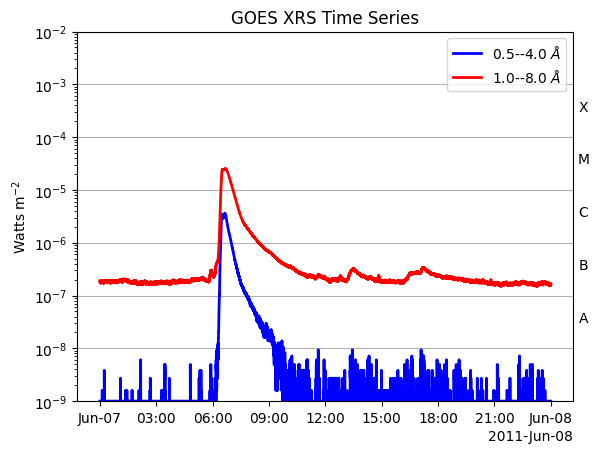

In [8]:
import matplotlib.pyplot as plt

ts_obj.plot()
plt.title('GOES XRS Time Series')
plt.show()